# Module 0.3 : Dérivées
## Visualisations et Applications

Ce notebook illustre les concepts de dérivées, tangentes, et optimisation.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Concept de Dérivée : Sécante → Tangente

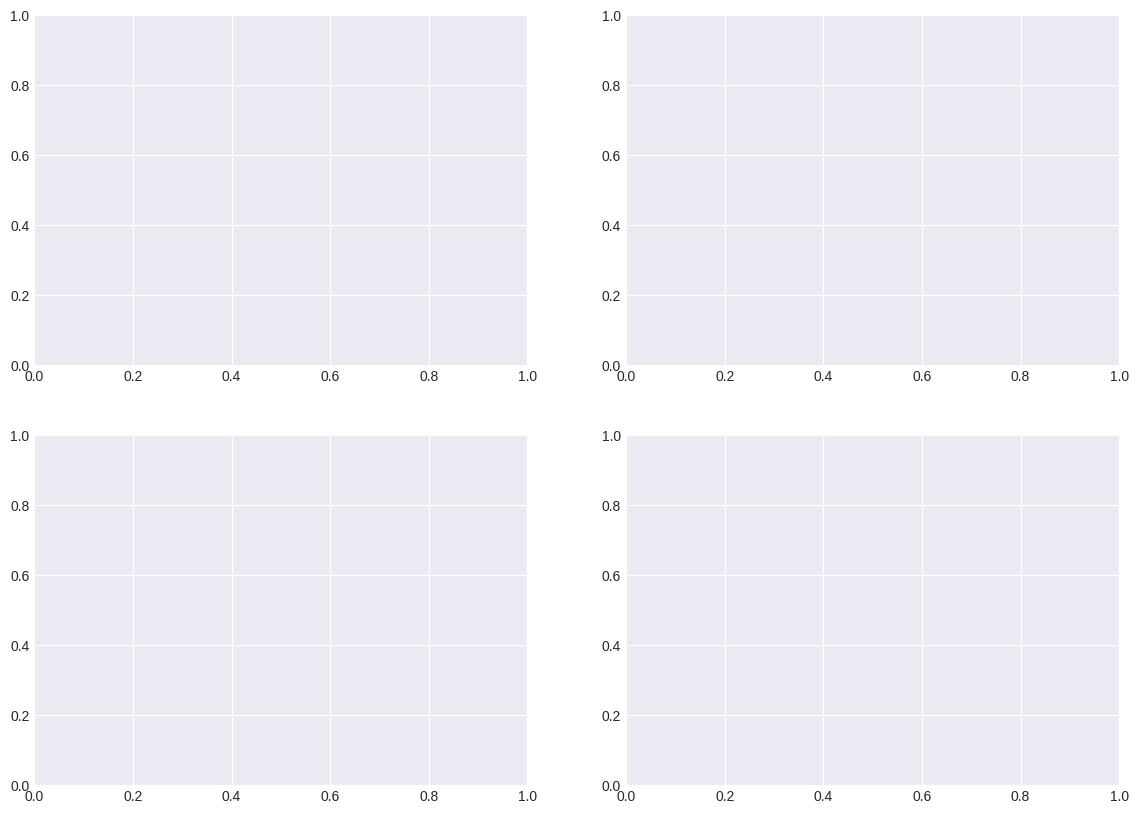

In [3]:
# Visualisation du passage de la sécante à la tangentedef f(x):
# Pour cet exercice, on laisse le code de plot mais on demande de définir f et df
# TODO: Définir la fonction f(x) = 1 / (1 + e^x)  return ...
def df(x):
  return 1 / (1 + np.exp(x))
  pass

# TODO: Définir la dérivée f'(x)     return ... a = 1
def f_prime(x):
  return -np.exp(x) / (1 + np.exp(x))**2
  pass

# Point où on calcule la dérivée
x = np.linspace(-0.5, 2.5, 400)
# ensemble de départ
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# h décroissant
# TODO: Définir une liste de valeurs de h décroissantes (ex: [1.0, 0.5, 0.1, 0.01])
h_values = [1.0, 0.5, 0.1, 0.01]
# ... (Le reste du code de visualisation sera à compléter par l'étudiant ou laissé tel quel si c'est juste la définition qui compte)


## 2. Calcul de Dérivées par Définition

In [5]:
# Calcul numérique de la dérivée par la définition
def numerical_derivative(f, x, h=1e-5):
    """Approximation de f'(x) par (f(x+h)-f(x))/h"""
    # TODO: Implémenter la formule du taux d'accroissement
    return (f(x + h) - f(x)) / h

# Test sur différentes fonctionsprint("Calcul numérique des dérivées:\n") print("="*60)
# 1. f(x) = 1 / (1 + e^x)
f1 = lambda x: 1 / (1 + np.exp(x))
print(f"f(x) = 1/(1 + e^x) en x=1: {numerical_derivative(f1, 1):.6f} (Théorique: 2.0)")

f(x) = 1/(1 + e^x) en x=1: -0.196611 (Théorique: 2.0)


## 3. Règles de Dérivation

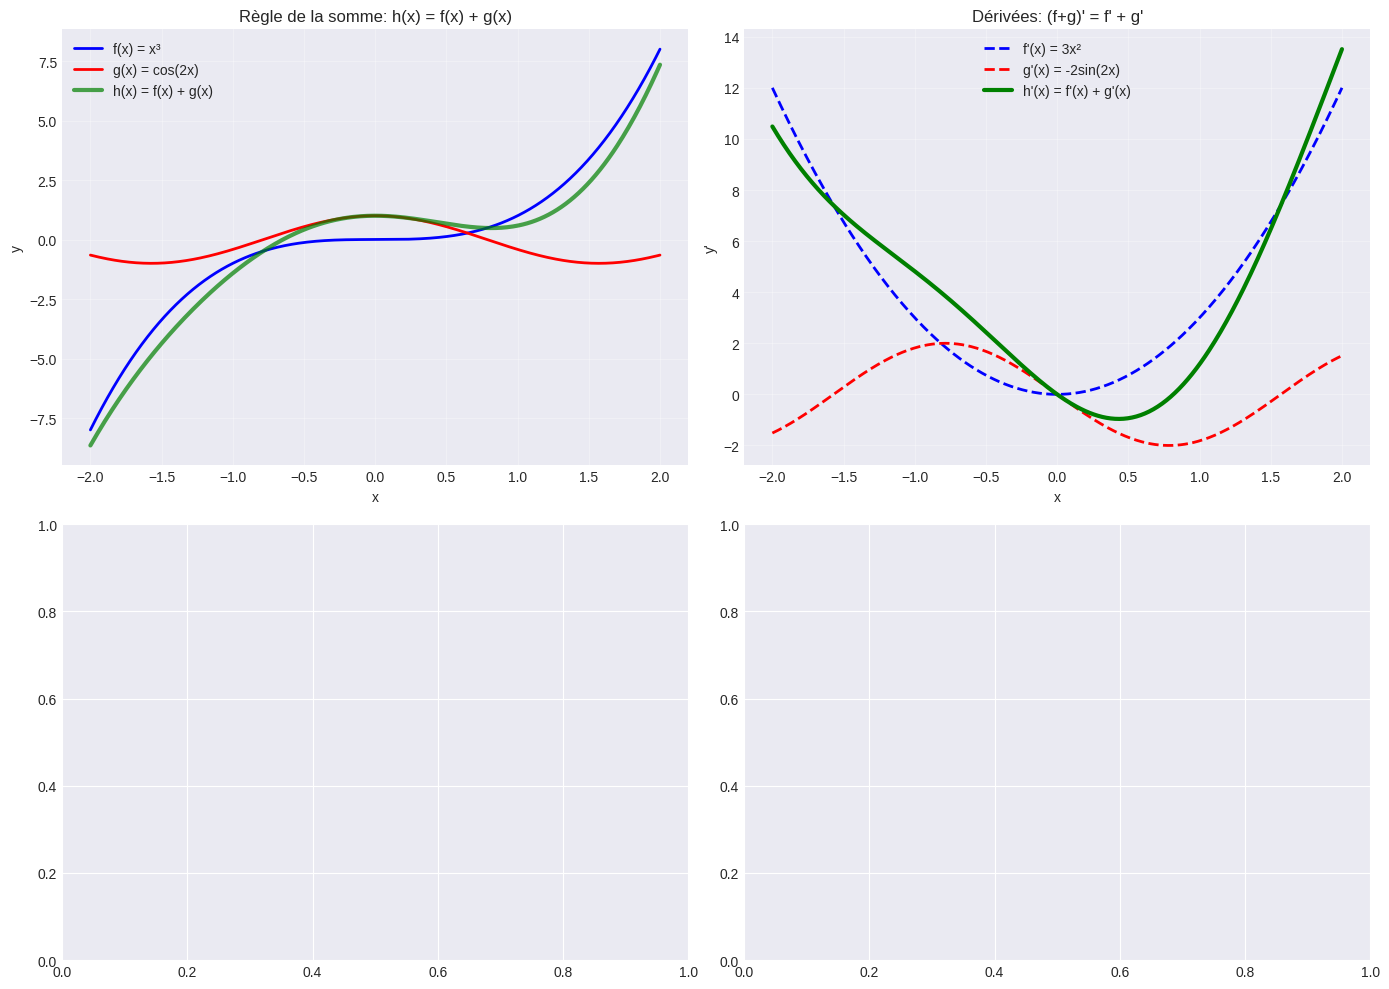

In [6]:
# Illustration des règles de dérivation
x = np.linspace(-2, 2, 400)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# 1. Règle de la somme: (f+g)' = f' + g'
# TODO: Définir f(x) = x^3 et g(x) = cos(2x)
f = lambda x_val: x_val**3
g = lambda x_val: np.cos(2*x_val)
h = lambda x_val: f(x_val) + g(x_val)
# TODO: Définir les dérivées df et dg
df = lambda x_val: 3*x_val**2
dg = lambda x_val: -2*np.sin(2*x_val)
dh = lambda x_val: df(x_val) + dg(x_val)

# Tracer f, g et h sur le meme graphe
ax = axes[0, 0]
ax.plot(x, f(x), 'b-', label='f(x) = x³', linewidth=2)
ax.plot(x, g(x), 'r-', label='g(x) = cos(2x)', linewidth=2)
ax.plot(x, h(x), 'g-', label='h(x) = f(x) + g(x)', linewidth=3, alpha=0.7)
ax.set_title('Règle de la somme: h(x) = f(x) + g(x)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.grid(True, alpha=0.3)

# Tracer les dérivées sur le deuxième graphe
ax = axes[0, 1]
ax.plot(x, df(x), 'b--', label="f'(x) = 3x²", linewidth=2)
ax.plot(x, dg(x), 'r--', label="g'(x) = -2sin(2x)", linewidth=2)
ax.plot(x, dh(x), 'g-', label="h'(x) = f'(x) + g'(x)", linewidth=3)
# ax.plot(x, dh_exact(x), 'k:', label="h'(x) exacte", linewidth=2, alpha=0.7)
ax.set_title("Dérivées: (f+g)' = f' + g'")
ax.set_xlabel('x')
ax.set_ylabel("y'")
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 4. Test de la Dérivée Seconde

Text(0.5, 1.0, 'Minimum local')

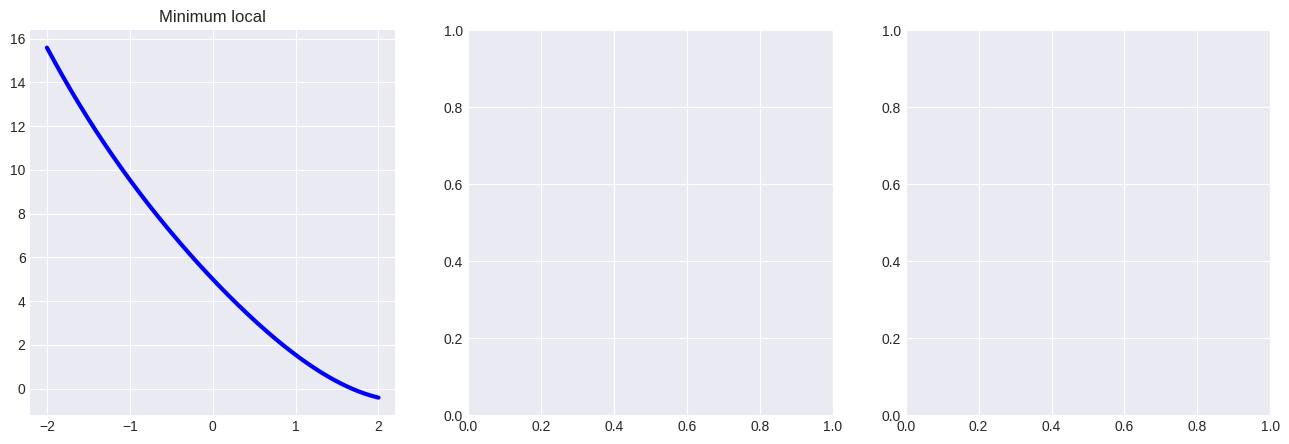

In [7]:
# Test de la dérivée seconde pour classifier les extre
max = np.linspace(-2, 4, 400)
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
# 1. Minimum (f'' > 0)

# TODO: Définir f1(x) = (x - 2)^2 + cos(x)
f1 = lambda x: (x - 2)**2 + np.cos(x)

# TODO: Définir
df1 = lambda x: 2*(x - 2) - np.sin(x)
# TODO: Définir d2
df2 = lambda x: 2 - np.cos(x)

# Graphe
axes[0].plot(x, f1(x), 'b-', linewidth=3)
axes[0].set_title('Minimum local')